In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


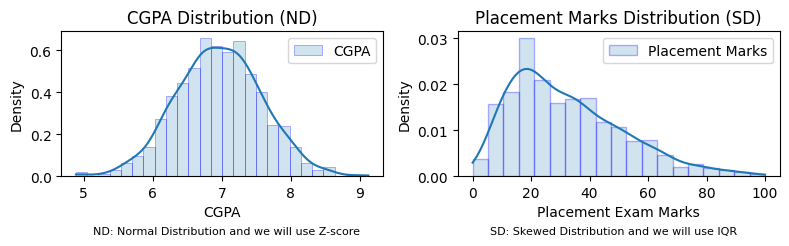

In [157]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(221)
sns.histplot(df['cgpa'], ax = ax, kde= True, stat = 'density', alpha = 0.2, edgecolor = (0,0,1, 0.3), label = "CGPA", legend = True )
ax.legend()
ax.set_xlabel('CGPA')
ax.set_title('CGPA Distribution (ND)')
ax1 = fig.add_subplot(222)
sns.histplot( df['placement_exam_marks'], ax = ax1, kde = True, stat = 'density', alpha = 0.2, edgecolor = (0,0,1,0.3), label = 'Placement Marks', legend = True)
ax1.legend()
ax1.set_xlabel( 'Placement Exam Marks')
ax1.set_title('Placement Marks Distribution (SD)')
plt.tight_layout()
ax.text( 0.1, -0.4, 'ND: Normal Distribution and we will use Z-score', transform = ax.transAxes , fontsize = 8)
ax1.text( 0.1, -0.4 , 'SD: Skewed Distribution and we will use IQR', transform = ax1.transAxes, fontsize = 8)
plt.show()

## Describe Placement Marks

In [158]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

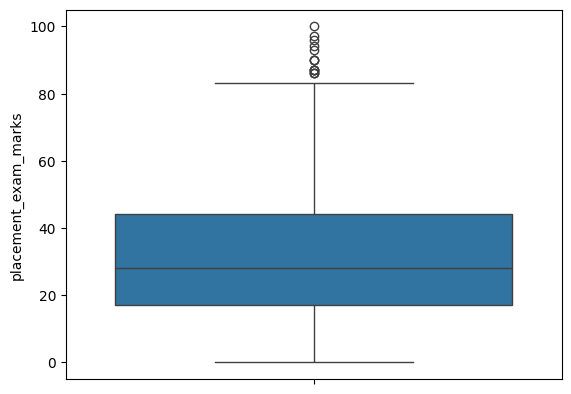

In [159]:
sns.boxplot( df['placement_exam_marks'])

## Finding IQR Value

In [165]:
perc25 = df['placement_exam_marks'].quantile(0.25)
perc75 = df['placement_exam_marks'].quantile(0.75)
perc25, perc75

(17.0, 44.0)

In [168]:
IQR = perc75 - perc25
IQR

27.0

## Calculate Upper and Lower limit

In [170]:
UpLmt = perc75 + 1.5*IQR
LoLmt = perc25 - 1.5*IQR
UpLmt, LoLmt

(84.5, -23.5)

In [171]:
print(f'''Upper Limit: {UpLmt}
Lower limit: {LoLmt}''')

Upper Limit: 84.5
Lower limit: -23.5


## Finding Outliers in Upper limit

In [184]:
df[df['placement_exam_marks'] > UpLmt ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [185]:
df[df['placement_exam_marks'] < LoLmt]

,cgpa,placement_exam_marks,placed


## Applying trimming method

In [189]:
new_df = df[(df['placement_exam_marks'] < UpLmt )]
new_df 

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


## Compare Before and After Trimming

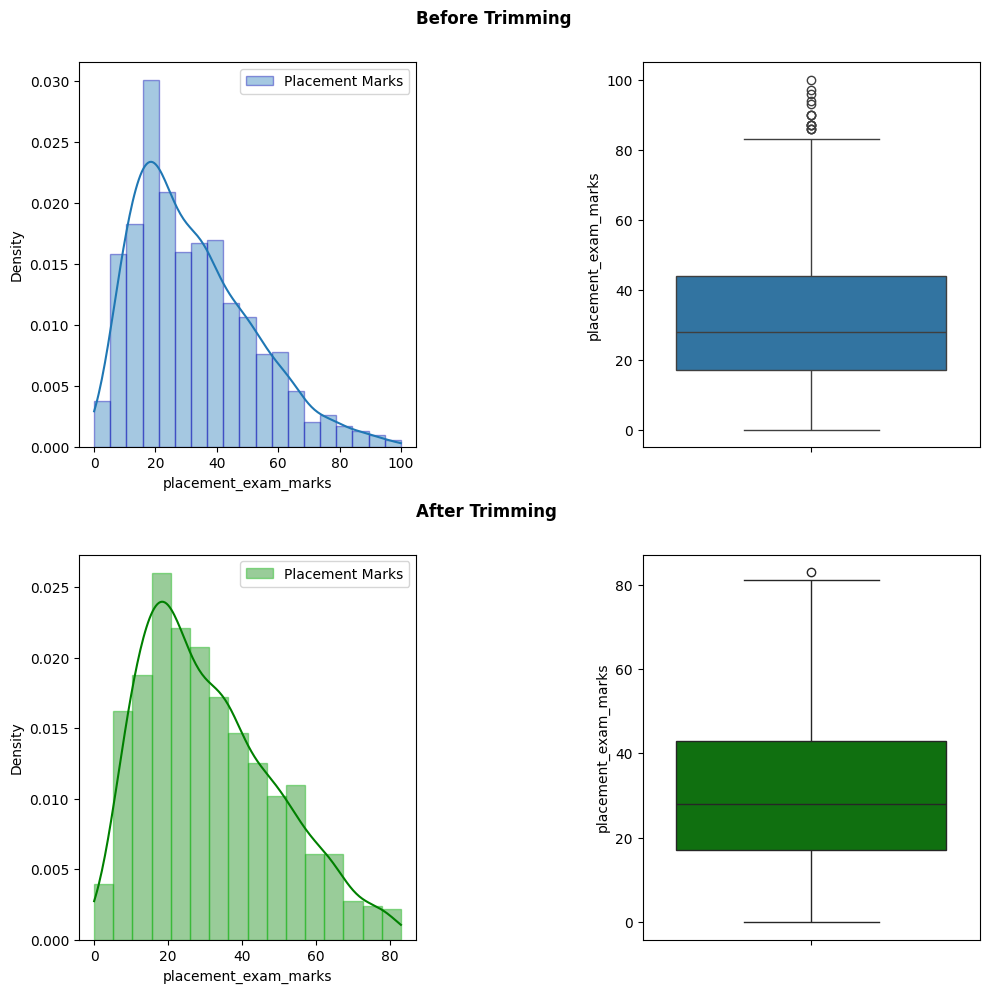

In [228]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
sns.histplot(df['placement_exam_marks'], ax = ax, kde = True, stat = 'density', legend = True, label = 'Placement Marks', alpha = 0.4, edgecolor = (0,0,0.7,0.4))
ax.legend()
ax1 = fig.add_subplot(222)
sns.boxplot(df['placement_exam_marks'], ax = ax1)
ax.text(1, 1.1, 'Before Trimming', weight = 'bold', fontsize = 12, transform = ax.transAxes)
ax2 = fig.add_subplot(223)
sns.histplot(new_df['placement_exam_marks'], ax = ax2, kde = True, stat = 'density', color = 'green', legend = True, label = 'Placement Marks', alpha = 0.4, edgecolor = (0,0.7,0,0.4))
ax2.legend()
ax2.text(1, 1.1 , 'After Trimming', weight = 'bold', fontsize = 12, transform = ax2.transAxes)
ax3 = fig.add_subplot(224)
sns.boxplot(new_df['placement_exam_marks'], ax = ax3, color = 'green')
plt.tight_layout()
plt.show()

In [229]:
new_df_cap = df.copy()

In [231]:
new_df_cap['placement_exam_marks'] = np.where( new_df_cap['placement_exam_marks'] > UpLmt, UpLmt, np.where(new_df_cap['placement_exam_marks'] < LoLmt, LoLmt, new_df_cap['placement_exam_marks']))
new_df_cap['placement_exam_marks']

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64

In [232]:
new_df_cap.shape

(1000, 3)

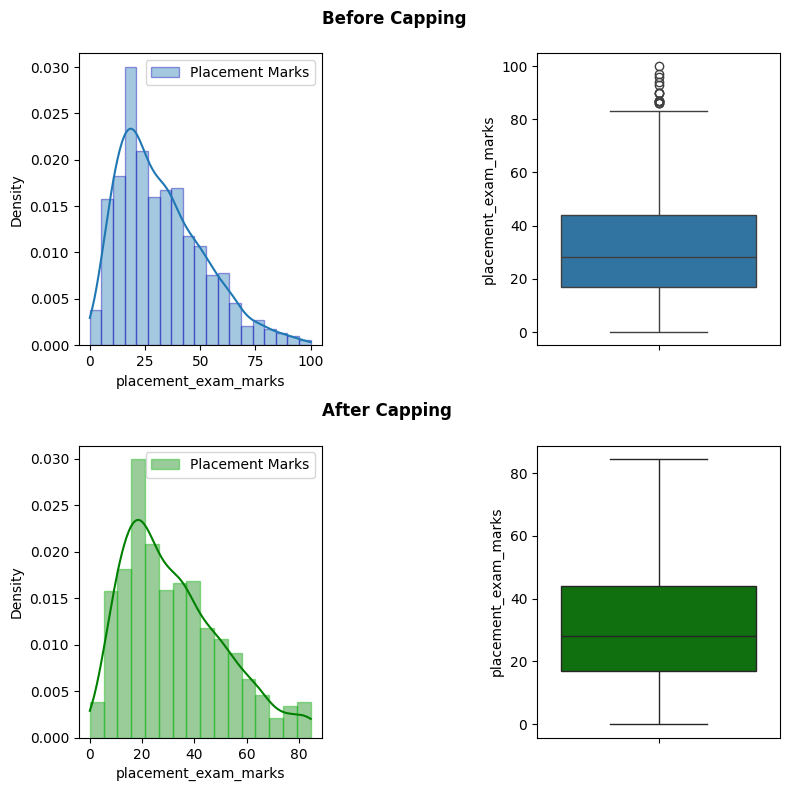

In [242]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(221)
sns.histplot(df['placement_exam_marks'], ax = ax, kde = True, stat = 'density', legend = True, label = 'Placement Marks', alpha = 0.4, edgecolor = (0,0,0.7,0.4))
ax.legend()
ax1 = fig.add_subplot(222)
sns.boxplot(df['placement_exam_marks'], ax = ax1)
ax.text(1, 1.1, 'Before Capping', weight = 'bold', fontsize = 12, transform = ax.transAxes)
ax2 = fig.add_subplot(223)
sns.histplot(new_df_cap['placement_exam_marks'], ax = ax2, kde = True, stat = 'density', color = 'green', legend = True, label = 'Placement Marks', alpha = 0.4, edgecolor = (0,0.7,0,0.4))
ax2.legend()
ax2.text(1, 1.1 , 'After Capping', weight = 'bold', fontsize = 12, transform = ax2.transAxes)
ax3 = fig.add_subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'], ax = ax3, color = 'green')
plt.tight_layout()
plt.show()